In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fname_aisles = "data/raw/aisles.csv"
fname_products = "data/raw/products.csv"
fname_userorders = "data/raw/orders.csv"
fname_productorders = "data/raw/order_products__prior.csv"

In [23]:
df_products = pd.read_csv(fname_products)
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [44]:
df_aisles = pd.read_csv(fname_aisles)
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
df_userorders = pd.read_csv(fname_userorders)
df_userorders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_counts = df_userorders.user_id.value_counts()

In [14]:
order_counts.min(), order_counts.max()

(4, 100)

/home/ubuntu/.virtualenvs/data-science/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


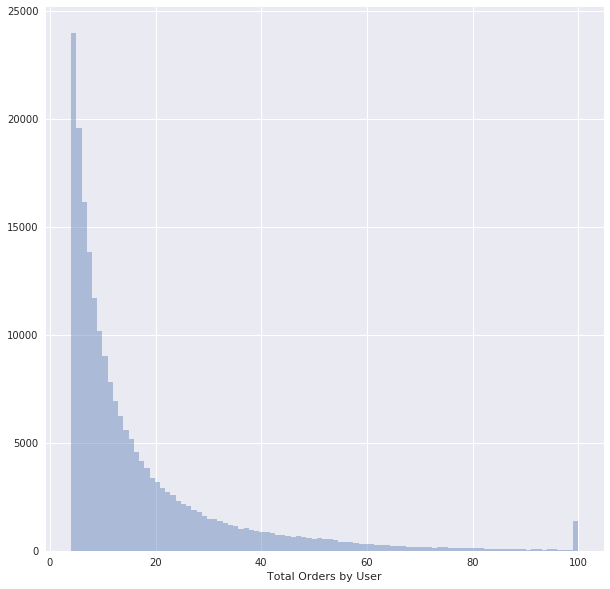

In [19]:
plt.figure(figsize=(10, 10))
sns.distplot(order_counts, bins=97, kde=False)
plt.xlabel("Total Orders by User")
plt.show()

In [20]:
df_productorders = pd.read_csv(fname_productorders)
df_productorders = df_productorders[['order_id', 'product_id']]

In [21]:
df_productorders.head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [45]:
df_productorders = df_productorders.merge(df_products[['product_id', 'aisle_id']], on='product_id')

In [30]:
product_order_counts = df_productorders['product_id'].value_counts()

In [31]:
product_order_counts = product_order_counts.to_frame(name='product_count')

,product_count
24852,472565
13176,379450
21137,264683
21903,241921
47209,213584


In [ ]:
product_order_counts = product_order_counts.merge(df_products, left_on=product_order_counts.index.values, right_on=df_products.product_id.values)

In [42]:
product_order_counts.head(50)

,key_0,product_count,product_id,product_name,aisle_id,department_id
0,24852,472565,24852,Banana,24,4
1,13176,379450,13176,Bag of Organic Bananas,24,4
2,21137,264683,21137,Organic Strawberries,24,4
3,21903,241921,21903,Organic Baby Spinach,123,4
4,47209,213584,47209,Organic Hass Avocado,24,4
5,47766,176815,47766,Organic Avocado,24,4
6,47626,152657,47626,Large Lemon,24,4
7,16797,142951,16797,Strawberries,24,4
8,26209,140627,26209,Limes,24,4
9,27845,137905,27845,Organic Whole Milk,84,16


In [51]:
aisle_counts = df_productorders['aisle_id'].value_counts()
aisle_counts = aisle_counts.to_frame(name='aisle_counts')
aisle_counts = aisle_counts.merge(df_aisles, left_on=aisle_counts.index.values, right_on=df_aisles.aisle_id.values)
aisle_counts.head(25)

,key_0,aisle_counts,aisle_id,aisle
0,24,3642188,24,fresh fruits
1,83,3418021,83,fresh vegetables
2,123,1765313,123,packaged vegetables fruits
3,120,1452343,120,yogurt
4,21,979763,21,packaged cheese
5,84,891015,84,milk
6,115,841533,115,water seltzer sparkling water
7,107,722470,107,chips pretzels
8,91,638253,91,soy lactosefree
9,112,584834,112,bread
